# IMPORTS AND INSTALLS

In [1044]:
!pip3 install smogn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [1045]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import smogn

In [1046]:
ss=SS()

# DATA CLEANING AND SYNTHETIC DATA PREP
**df -> synthetic dataframe**<br>
**df_org-> orginal dataframe**

In [1047]:
df_org=pd.read_csv('../train_data_329x19.csv')
df_org.drop(axis=1,labels='Unnamed: 0',inplace=True)
df_org.dropna(axis=0,inplace=True)
df_org.replace(to_replace=2180.0,value=218,inplace=True)
df_org.reset_index(drop=True,inplace=True)
df_org['patient_age']=df_org['patient_age'].astype(int)
df = smogn.smoter(
    
    ## main arguments
    data = df_org,           ## pandas dataframe
    y = 'fluids',          ## string ('header name')
    k =3,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.2,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'both',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.5       ## positive real number (0 < R)
)
df= df.round(2)
x=df.iloc[:,:13]

y=df.iloc[:,17:18]

y
x_val=df_org.iloc[:,:13]

y_val=df_org.iloc[:,17:18]
df.shape


r_index: 100%|##########| 30/30 [00:00<00:00, 1159.78it/s]


(697, 19)

In [1048]:
df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0
1,71,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0
3,41,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,90.0,1.0,5.0
4,54,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0
5,40,1,155.0,60.0,12.60,14.60,0.79,135.0,4.1,83.0,10.78,22.8,24.8,1780.0,244.0,29.6,45.0,2.7,3.0


In [1049]:
y.loc[y.fluids>100]=y.loc[y.fluids>100]/200
y_val.loc[y_val.fluids>100]=y_val.loc[y_val.fluids>100]/200


In [1050]:
y.describe()

,fluids
count,697.000000
mean,2.947346
std,0.697288
min,1.000000
25%,2.600000
50%,2.900000
75%,3.000000
max,5.000000


array([[<AxesSubplot:title={'center':'fluids'}>]], dtype=object)

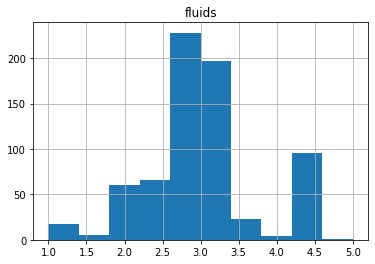

In [1051]:
y.hist(bins=10)

In [1052]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_age     697 non-null    int64  
 1   patient_gender  697 non-null    int64  
 2   Ht              697 non-null    float64
 3   Wt              697 non-null    float64
 4   HB              697 non-null    float64
 5   UREA            697 non-null    float64
 6   CR              697 non-null    float64
 7   Na              697 non-null    float64
 8   K               697 non-null    float64
 9   FBS             697 non-null    float64
 10  HBA1C           697 non-null    float64
 11  SGOT            697 non-null    float64
 12  SGPT            697 non-null    float64
 13  calories        697 non-null    float64
 14  cho             697 non-null    float64
 15  Fat             697 non-null    float64
 16  pro             697 non-null    float64
 17  fluids          697 non-null    flo

In [1053]:
df_org.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


In [1054]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,56.215208,0.579627,159.986270,67.200617,13.235452,81.209110,1.137719,134.904892,4.078737,83.826270,6.475897,23.918006,25.364763,1650.827733,227.691549,27.072367,66.612984,22.504735,5.743027
std,17.601745,0.493973,5.949638,8.181230,2.132937,38.254952,1.089177,2.580987,0.392561,10.537156,1.826665,9.602656,9.862875,223.111991,28.578717,3.531846,6.757015,118.134061,1.695633
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,82.880000,4.600000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,44.000000,0.000000,156.610000,64.000000,12.090000,33.690000,0.870000,135.000000,4.100000,83.000000,5.350000,22.800000,24.800000,1520.000000,209.000000,25.000000,63.000000,2.700000,5.000000
50%,59.000000,1.000000,160.000000,68.060000,13.690000,105.940000,0.900000,135.000000,4.100000,83.000000,5.800000,22.800000,24.800000,1610.000000,221.000000,26.500000,67.670000,2.900000,6.000000
75%,70.000000,1.000000,163.000000,71.000000,14.800000,106.940000,0.970000,135.000000,4.100000,83.000000,6.970000,22.800000,24.800000,1780.000000,244.000000,29.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.790000,157.000000,6.710000,276.000000,14.600000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


In [1055]:
df.to_csv('oversampled_data.csv')

# TEST TRAIN SPLIT

In [1056]:
x_train,x_test,y_train,y_test=train_test_split(x_val,y_val,test_size=0.3);

In [1057]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=2)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [1058]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

# TRAIN ACC WITH ORGINAL DATASET

In [1059]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))


TRAIN ACC:
LR acc:  0.32105188872865176
ElasticNet acc:  0.26048656524502756
RandomForest acc:  0.5407394052030483
AdaBoost acc:  0.6479343107365285
GradientBoost acc:  0.7394768051842882
PCA acc:  -55.325791962185995
GPR acc:  0.32071741148316824
SVR acc:  0.8861236561639811


# TEST ACC AFTER TRAIN WITH ORGINAL DATASET

In [1060]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.32649058354065064
ElasticNet acc:  0.32030960751849546
RandomForest acc:  0.5170791814212794
AdaBoost acc:  -0.055237241665799575
GradientBoost acc:  0.45457511984322785
PCA acc:  -53.00160725175937
GPR acc:  0.32225372260382523
SVR acc:  0.06263707944588004


# TRAIN SYNTHETIC TEST ORGINAL

In [1061]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=1)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [1062]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0);

In [1063]:
x

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,64,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8
1,71,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1
3,41,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0
4,54,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8
5,40,1,155.0,60.0,12.60,14.60,0.79,135.0,4.1,83.0,10.78,22.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,57,1,160.0,51.0,13.91,105.15,0.89,135.0,4.1,83.0,5.80,22.8,24.8
321,27,1,164.0,74.0,16.11,105.92,0.86,135.0,4.1,83.0,5.18,22.8,24.8
322,48,1,159.0,68.5,16.57,105.60,0.87,135.0,4.1,83.0,7.31,22.8,24.8
323,85,1,163.0,78.0,16.43,107.76,0.85,135.0,4.1,83.0,5.80,22.8,24.8


In [1064]:
y

,fluids
0,3.0
1,2.8
3,1.0
4,3.0
5,2.7
...,...
320,3.0
321,3.0
322,3.0
323,2.0


In [1065]:
lr.fit(x,y.values.ravel())
en.fit(x,y.values.ravel())
rf.fit(x,y.values.ravel())
ab.fit(x,y.values.ravel())
gb.fit(x,y.values.ravel())
pca.fit(x,y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x,y.values.ravel())
svr.fit(x,y.values.ravel())

SVR(gamma='auto')

# ACC WITH SYNTHETIC DATA

In [1066]:
print('LR acc: ',lr.score(x,y.values.ravel()))
print('ElasticNet acc: ',en.score(x,y.values.ravel()))
print('RandomForest acc: ',rf.score(x,y.values.ravel()))
print('AdaBoost acc: ',ab.score(x,y.values.ravel()))
print('GradientBoost acc: ',gb.score(x,y.values.ravel()))

#fh.write("Gradient Boosting acc: "+str(gb.score(x,y.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x,y.values.ravel()))
print("GPR acc: ",gpr.score(x,y.values.ravel()))
print("SVR acc: ",svr.score(x,y.values.ravel()))

LR acc:  0.14155709654187165
ElasticNet acc:  0.11106692411888575
RandomForest acc:  0.2911187661450184
AdaBoost acc:  0.31317712536491915
GradientBoost acc:  0.3640825842939658
PCA acc:  -53.56540886870831
GPR acc:  0.14143184388471797
SVR acc:  0.895963974938957


# ACC WITH ACTUAL DATA

In [1067]:
print('LR acc: ',lr.score(x_val,y_val.values.ravel()))
print('ElasticNet acc: ',en.score(x_val,y_val.values.ravel()))
print('RandomForest acc: ',rf.score(x_val,y_val.values.ravel()))
print('AdaBoost acc: ',ab.score(x_val,y_val.values.ravel()))
print('GradientBoost acc: ',gb.score(x_val,y_val.values.ravel()))

#fh.write("Gradient Boosting acc: "+str(gb.score(x_val,y_val.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_val,y_val.values.ravel()))
print("GPR acc: ",gpr.score(x_val,y_val.values.ravel()))
print("SVR acc: ",svr.score(x_val,y_val.values.ravel()))

LR acc:  0.09846639779827837
ElasticNet acc:  0.05528471759611009
RandomForest acc:  0.5025809343748884
AdaBoost acc:  -0.1264203864847393
GradientBoost acc:  0.3810506797990858
PCA acc:  -53.23198960893999
GPR acc:  0.0989814466716098
SVR acc:  0.9181417868198347


# RMSE WHEN PREDICTING WITH ACTUAL DATA

In [1068]:

print('LR acc: ',metrics.mean_squared_error(y_val,lr.predict(x_val))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_val,en.predict(x_val))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_val,rf.predict(x_val))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_val,ab.predict(x_val))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_val,gb.predict(x_val))**0.5)

#fh.write("Gradient Boosting acc: "+str(metrics.mean_squared_error(y_val,lr.predict(x_val))**0.5)+"\n")
#print("PCA acc: ",metrics.mean_squared_error(y_val,pca.predict(x_val)**0.5))
#print("GPR acc: ",metrics.mean_squared_error(y_val,gpr.predict(x_val)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_val,svr.predict(x_val)**0.5))

LR acc:  0.4766187901148923
ElasticNet acc:  0.4878998348050072
RandomForest acc:  0.3540310998724869
AdaBoost acc:  0.5327585786545395
GradientBoost acc:  0.3949187427782924
SVR acc:  1.2789758354999483


# CONCLUSION:
- Support Vectors and Random Forest perform better
- training with synthetic data and predicting with the actual data provides better results than just training and predicting with the original dataset 